# Step 1: Importing Library and file 

In [602]:
import warnings
warnings.filterwarnings("ignore")

In [603]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [604]:
lead = pd.read_csv(r'C:\Users\Admin\Desktop\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [605]:
lead.shape

(9240, 37)

In [606]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [607]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning and Preparation

In [608]:
for col in lead.columns:
    if lead[col].isnull().sum() > 3500:
        lead.drop(col, 1, inplace=True)

In [609]:
lead.isnull().sum()*100/len(lead)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [610]:
lead.drop(['City','Country'],axis =1,inplace=True)
# variable city and country is of no use for our analysis  

In [611]:
lead.drop(['Prospect ID','Lead Number'],axis = 1,inplace =True)

In [612]:
lead.drop(['How did you hear about X Education'],axis =1,inplace=True)

In [613]:
lead.isnull().sum()*100/len(lead)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [614]:
lead['TotalVisits'].value_counts(normalize = True )

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
25.0     0.000549
24.0     0.000549
27.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
115.0    0.000110
41.0     0.000110
55.0     0.000110
251.0    0.000110
141.0    0.000110
32.0     0.000110
42.0     0.000110
74.0     0.000110
43.0     0.000110
30.0     0.000110
54.0     0.000110
Name: TotalVisits, dtype: float64

In [615]:
lead = lead[~lead['TotalVisits'].isnull()]


In [616]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [617]:
lead['Lead Source'].astype('category').value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [618]:
leadsource =lead['Lead Source'].mode()[0]

In [619]:
lead['Lead Source'].fillna(leadsource,inplace=True)

In [620]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [621]:
lead['What is your current occupation'].astype('category').value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [622]:
occupation=lead['What is your current occupation'].mode()[0]

In [623]:
lead['What is your current occupation'].fillna(occupation,inplace=True)

In [624]:
lead['What matters most to you in choosing a course'].astype('category').value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [625]:
choosingcourse = lead['What matters most to you in choosing a course'].mode()[0]

In [626]:
lead['What matters most to you in choosing a course'].fillna(choosingcourse,inplace=True)

In [627]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [628]:
lead['Lead Profile'].astype('category').value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [629]:
lead.drop(['Lead Profile'],axis=1,inplace= True)
#there many select/null values so it not help in analysis so droping  

In [630]:
lead['Tags'].astype('category').value_counts()

Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [631]:
tags=lead['Tags'].mode()[0]

In [632]:
lead['Tags'].fillna(tags,inplace =True)

In [633]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [634]:
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('-----------------------------------')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
-----------------------------------
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
-----------------------------------
No     8379
Yes     724
Name: Do Not Email, dtype: int64
-----------------------------------
No     9101
Yes       2
Name: Do Not Call, dtype: int64
-----------------------------------
0    

As we see in this Do Not Email,Do Not Call,Search,Magazine,Newspaper , X Education Forums,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses ,Update me on Supply Chain Content, Get updates on DM Content,I agree to pay the amount through cheque,Newspaper Article values of these variable are mostly NO so it would not help in analysis so droping

In [635]:
lead.drop(['Do Not Email','Tags','Do Not Call','Search','Magazine','Newspaper' , 'X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses' ,'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','Newspaper Article'],axis=1,inplace=True)

In [636]:
lead.shape

(9103, 12)

In [637]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                     0
What matters most to you in choosing a course       0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [638]:
specilization=lead['Specialization'].mode()[0]

In [639]:
lead['Specialization'].fillna(specilization,inplace =True)

In [640]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


# Step 3: Data Visualisation

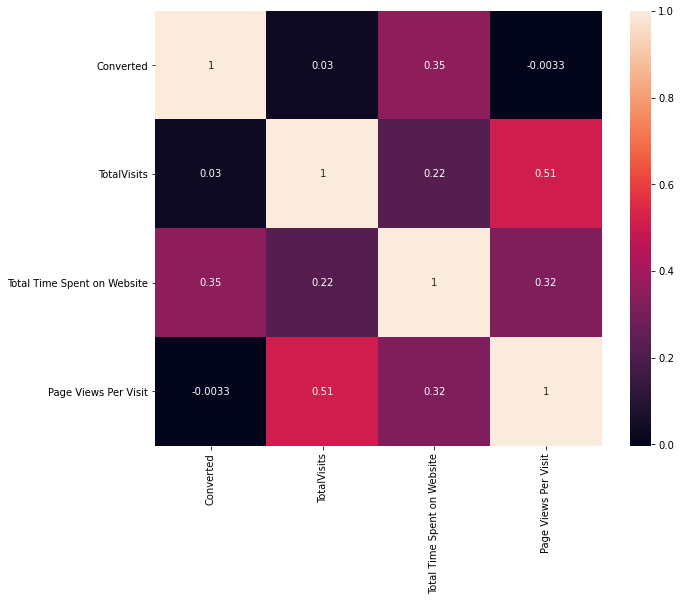

In [641]:
plt.figure(figsize=[10,8])
sns.heatmap(lead.corr(),annot=True)
plt.show()

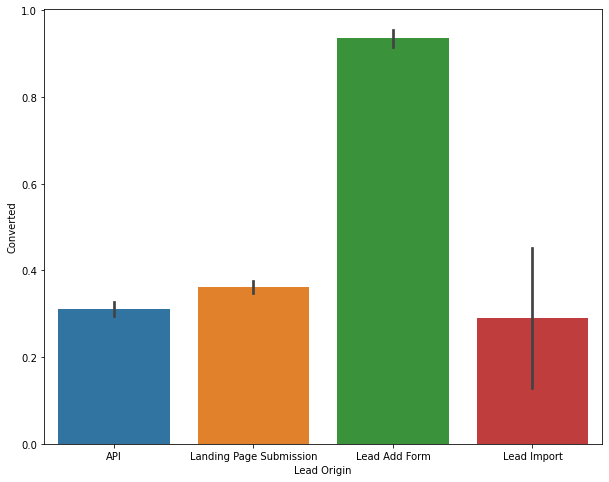

In [642]:
plt.figure(figsize=[10,8])
sns.barplot('Lead Origin', 'Converted',data = lead)
plt.show()

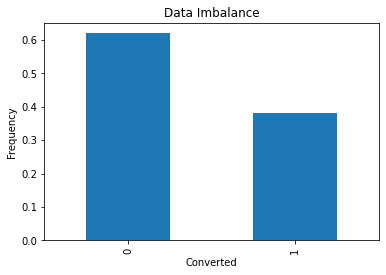

In [643]:
lead.Converted.value_counts(normalize = True).plot.bar()
plt.title("Data Imbalance",fontsize = 12)
plt.xlabel("Converted")
plt.ylabel("Frequency")
plt.show()

<Figure size 720x576 with 0 Axes>

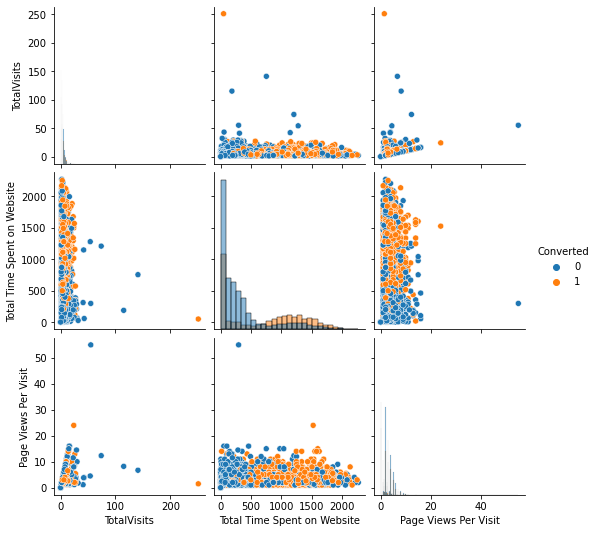

In [644]:
plt.figure(figsize=[10,8])
sns.pairplot(lead, hue='Converted', diag_kind="hist")
plt.show()

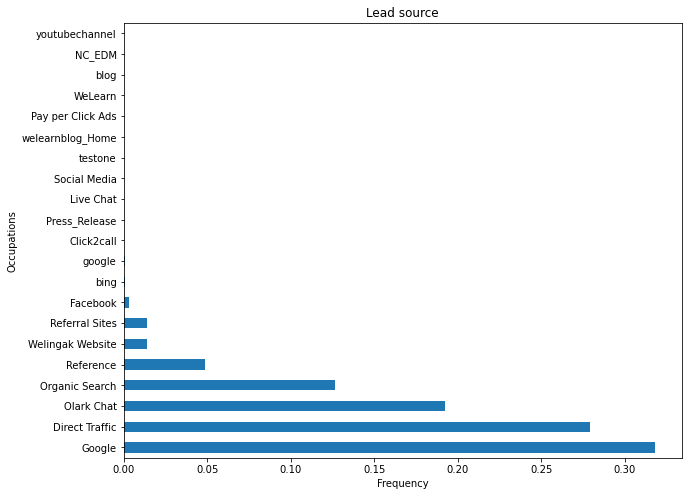

In [645]:
plt.figure(figsize=[10,8])
plt.title("Lead source")
plt.xlabel("Frequency")
plt.ylabel("Occupations")
lead['Lead Source'].value_counts(normalize = True).plot.barh()
plt.show()

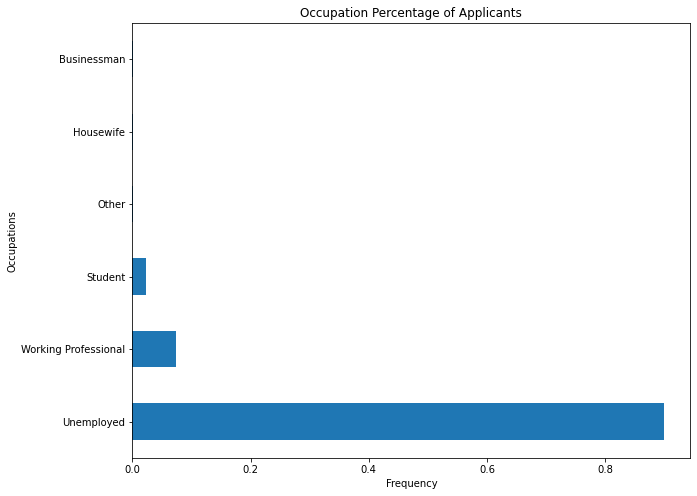

In [646]:
plt.figure(figsize=[10,8])
plt.title("Occupation Percentage of Applicants")
plt.xlabel("Frequency")
plt.ylabel("Occupations")
lead['What is your current occupation'].value_counts(normalize = True).plot.barh()
plt.show()

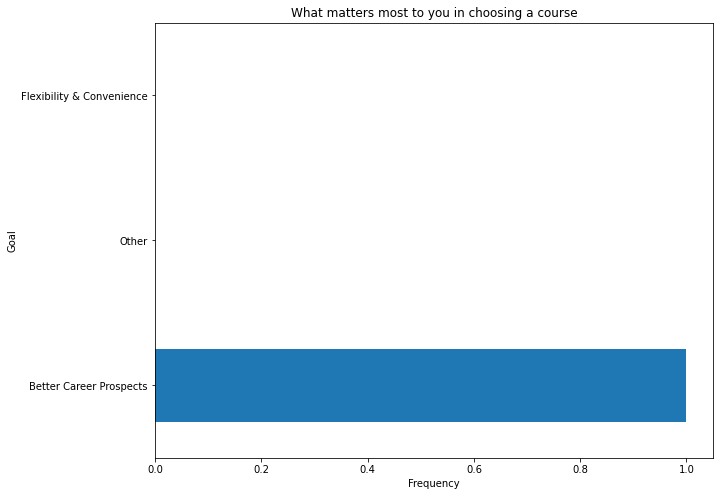

In [647]:
plt.figure(figsize=[10,8])
plt.title("What matters most to you in choosing a course")
plt.xlabel("Frequency")
plt.ylabel("Goal")
lead['What matters most to you in choosing a course'].value_counts(normalize = True).plot.barh()
plt.show()

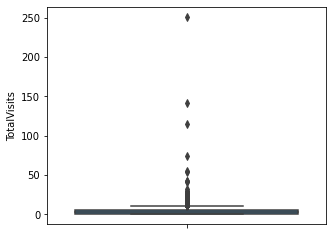

In [648]:
plt.figure(figsize=[5,4])
sns.boxplot(y='TotalVisits',data = lead)
plt.show()

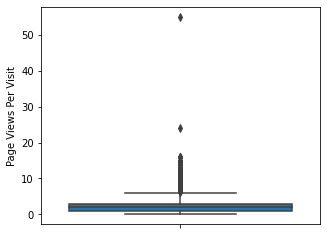

In [649]:
plt.figure(figsize=[5,4])
sns.boxplot(y='Page Views Per Visit',data = lead)
plt.show()

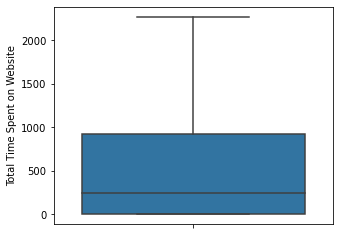

In [650]:
plt.figure(figsize=[5,4])
sns.boxplot(y='Total Time Spent on Website',data = lead)
plt.show()

# Step 4: Outlier treatment 

In [651]:
num_columns = lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_columns.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


In [652]:
lead= lead[~(lead['TotalVisits']> 20)]
lead.shape

(9056, 12)

In [653]:
lead= lead[~(lead['Page Views Per Visit']> 10)]
lead.shape

(9012, 12)

In [654]:
lead= lead[~(lead['Total Time Spent on Website']> 2000)]
lead.shape

(8992, 12)

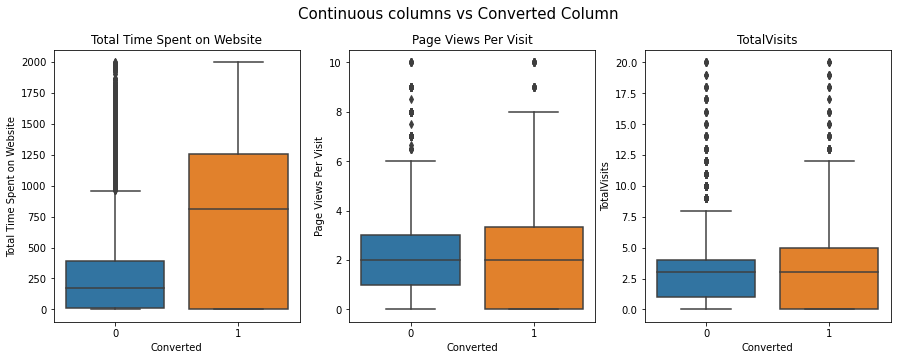

In [655]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))

fig.set_constrained_layout(True)
fig.suptitle('Continuous columns vs Converted Column',fontsize=15,y=1)

sns.boxplot(y='Total Time Spent on Website', x='Converted',
            data=lead, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(y='Page Views Per Visit', x='Converted',
            data=lead, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(y='TotalVisits', x='Converted',
            data=lead, ax=ax[2], orient='v')
ax[2].set_title('TotalVisits')

plt.show()

In [656]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8992.000000,8992.000000,8992.000000,8992.000000
mean,0.379337,3.220974,475.723532,2.290355
std,0.485249,3.080175,539.671217,1.934344
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,1.000000
50%,0.000000,3.000000,241.000000,2.000000
75%,1.000000,5.000000,907.250000,3.000000
90%,1.000000,7.000000,1366.000000,5.000000
95%,1.000000,9.000000,1545.450000,6.000000
99%,1.000000,14.000000,1809.180000,8.000000


# Step 5: Creating dummy variable 

In [657]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [658]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)

lead = pd.concat([lead,dummy],axis = 1)

In [659]:
dummy2 = pd.get_dummies(lead['Specialization'],prefix='Specialization')
dummy2 = dummy2.drop('Specialization_Select', 1)
lead = pd.concat([lead,dummy2],1)

In [660]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
     

In [661]:
# Drop the variables for which the dummy variables have been created
lead.drop(['Lead Origin', 'Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview','Last Notable Activity'],axis=1,inplace =True)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Select,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Select,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Select,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [662]:
lead.shape

(8992, 85)

In [663]:
lead.drop(['Specialization'],axis =1,inplace =True)

# Step 6: Test-Train Split

In [664]:
from sklearn.model_selection import train_test_split

In [782]:
#dividing df in train and test split 
lead_train , lead_test = train_test_split(lead , train_size=0.7 ,random_state=40)
print(lead_train.shape)
print(lead_test.shape)

(6294, 84)
(2698, 84)


In [783]:
#create x_train and y_train
y_train = lead_train.pop('Converted')
X_train = lead_train

In [784]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [785]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8670,0.00,0.000000,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,0.15,0.077655,0.30,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3190,0.20,0.801603,0.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,0.25,0.444389,0.25,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8058,0.10,0.062124,0.20,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [786]:
sum(lead['Converted']/len(lead['Converted'])*100)

37.933718861209165

We have 38% approx converted rate 

# Step 7: Looking at Correlations

In [787]:
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.045263,0.353792,-0.002486,-0.039559,0.308531,-0.010790,-0.073873,-0.010790,0.034833,...,0.002404,-0.006049,0.067154,0.009201,0.045026,-0.006808,0.010532,-0.013233,0.017095,-0.009395
TotalVisits,0.045263,1.000000,0.341767,0.699563,0.422302,-0.259927,-0.056581,0.128201,-0.054117,0.188809,...,0.048969,0.055402,0.042904,0.063296,0.046246,0.032140,0.045002,0.026584,0.062374,0.097152
Total Time Spent on Website,0.353792,0.341767,1.000000,0.349219,0.298937,-0.194577,-0.051583,0.145494,-0.050219,0.212788,...,0.036901,0.025964,0.067682,0.042802,0.062801,0.028822,0.024494,0.005058,0.053713,0.043723
Page Views Per Visit,-0.002486,0.699563,0.349219,1.000000,0.531934,-0.299499,-0.061799,0.155048,-0.057875,0.236108,...,0.067099,0.075248,0.063952,0.073176,0.062299,0.043850,0.027124,0.019105,0.075474,0.110850
Lead Origin_Landing Page Submission,-0.039559,0.422302,0.298937,0.531934,1.000000,-0.288294,-0.063022,0.528735,-0.059219,0.075210,...,0.146573,0.096630,0.135355,0.100537,0.127837,0.074632,0.055550,0.051418,0.128458,0.109867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.006808,0.032140,0.028822,0.043850,0.074632,-0.019132,-0.006078,0.027726,-0.006078,0.015688,...,-0.021133,-0.014473,-0.032557,-0.015505,-0.024967,1.000000,-0.009219,-0.006820,-0.020547,-0.015385
Specialization_Rural and Agribusiness,0.010532,0.045002,0.024494,0.027124,0.055550,-0.013987,-0.005247,0.025617,-0.005247,-0.028662,...,-0.018245,-0.012495,-0.028108,-0.013386,-0.021555,-0.009219,1.000000,-0.005888,-0.017739,-0.013282
Specialization_Services Excellence,-0.013233,0.026584,0.005058,0.019105,0.051418,-0.011013,-0.003882,0.056926,-0.003882,-0.026985,...,-0.013498,-0.009244,-0.020795,-0.009903,-0.015947,-0.006820,-0.005888,1.000000,-0.013124,-0.009826
Specialization_Supply Chain Management,0.017095,0.062374,0.053713,0.075474,0.128458,-0.025691,-0.001776,0.104135,-0.001776,-0.026208,...,-0.040666,-0.027850,-0.062648,-0.029836,-0.048044,-0.020547,-0.017739,-0.013124,1.000000,-0.029604


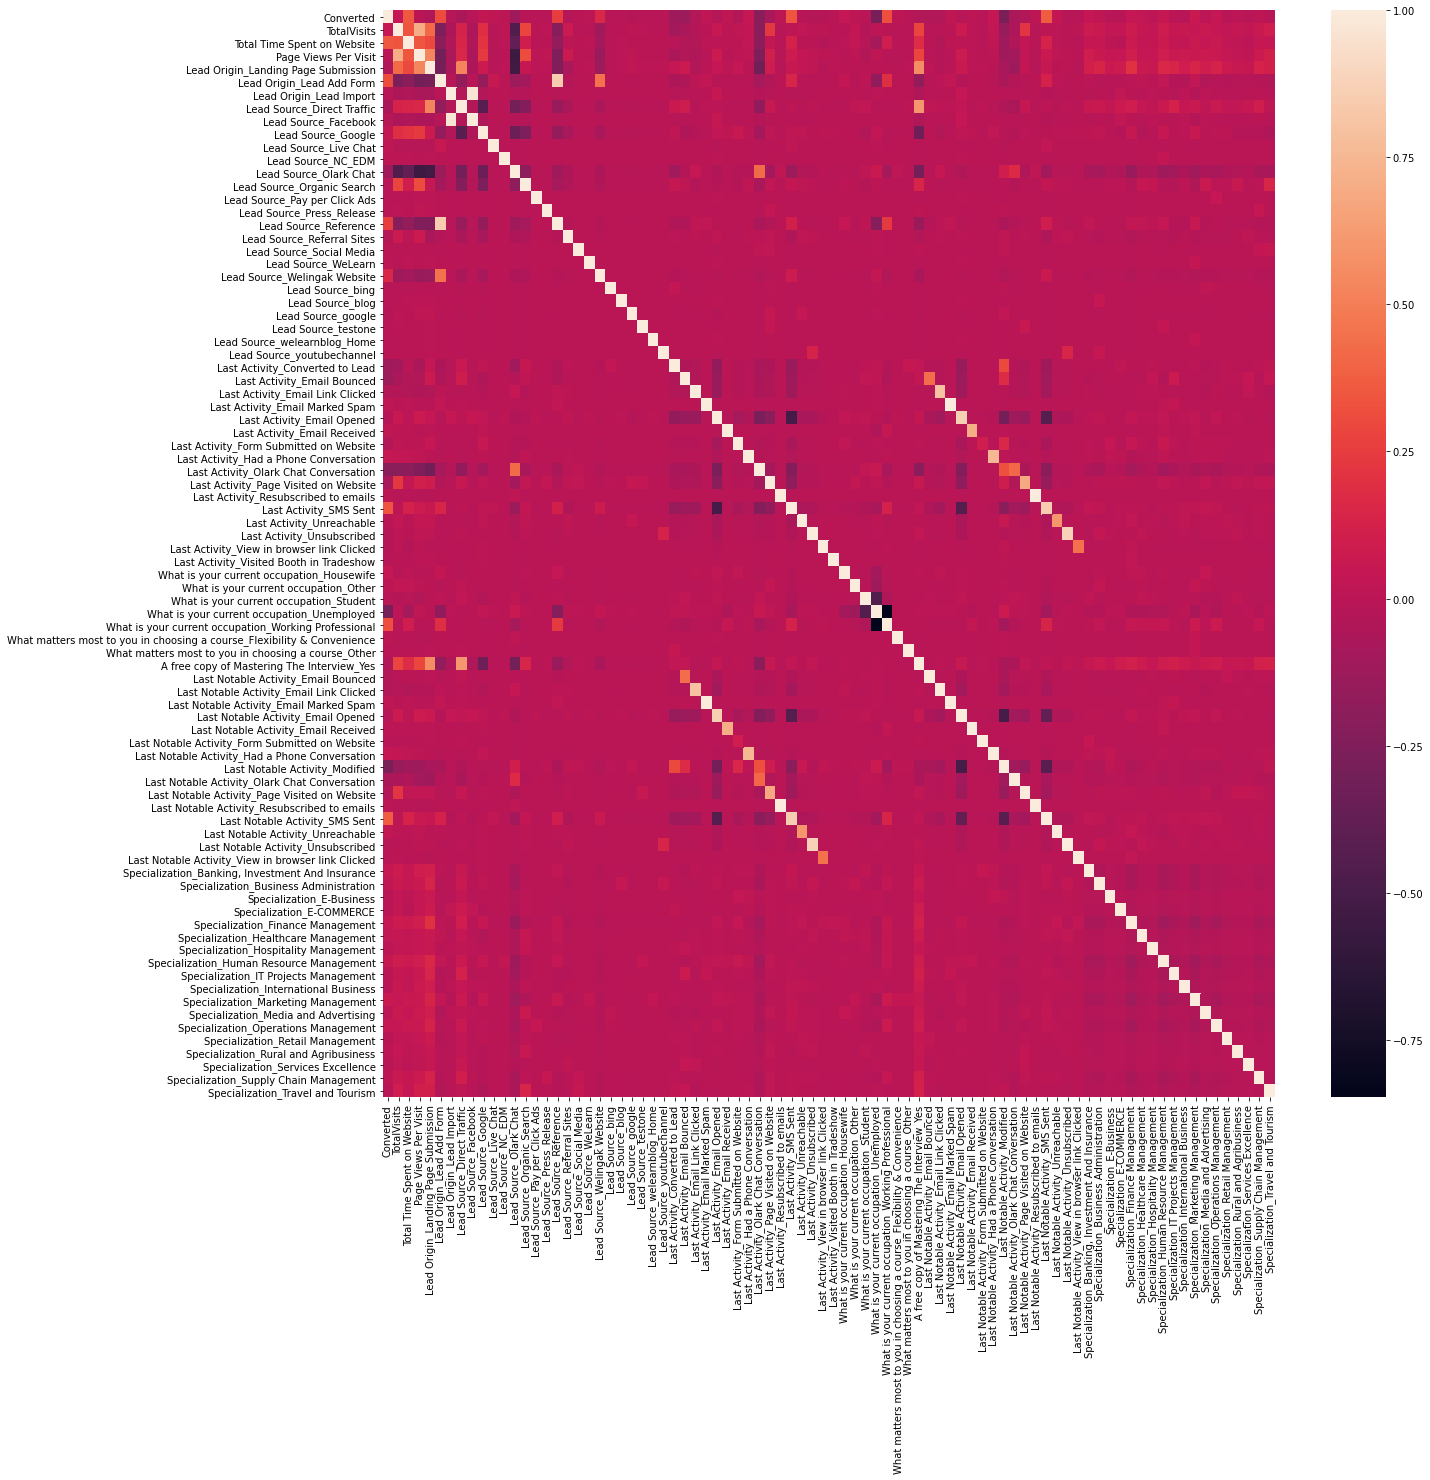

In [788]:
plt.figure(figsize=[20,20])
sns.heatmap(lead.corr())
plt.show()

# Step 8: Model Building 

In [789]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [790]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [791]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [792]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 65),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 51),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 44),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 38),
 ('Lead Source_google', False, 33),
 ('Lead Source_testone', False, 57),
 ('Lead Source_welearnblog_Home', False, 67),


In [793]:
col = X_train.columns[rfe.support_]

In [794]:
# Select only the columns selected by RFE

X_train = X_train[col]

# Statsmodel

In [795]:
import statsmodels.api as sm

In [796]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.0
Date:                Tue, 14 Jun 2022   Deviance:                       5282.1
Time:                        13:01:52   Pearson chi2:                 6.63e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8437      0.145    -19.658      0.000      -3.127      -2.560
TotalVisits                                              1.0798      0.265      4.070      0.000       0.560       1.600
Total Time Spent on Website                              4.1233      0.148     27.831      0.000       3.833       4.414
Lead Origin_Lead Add Form                                4.2028      0.234     17.932      0.000       3.743       4.662
Lead Source_Olark Chat                                   1.4108      0.113     12.437      0.000       1.188       1.633
Lead Source_Welingak Website                            22.4963    1.5e+04      0.002      0.999   -2.93e+04    2.94e+04
Last Activity_Email Bounced                             -1.3566      0.370     -3.668      0.000      -2.081      -0.632
Last Activity_Email Opened                               1.0545      0.155      6.820      0.000       0.751       1.358
Last Activity_Had a Phone Conversation                   1.9785      0.816      2.425      0.015       0.380       3.577
Last Activity_SMS Sent                                   1.6049      0.113     14.249      0.000       1.384       1.826
What is your current occupation_Working Professional     2.8054      0.194     14.474      0.000       2.425       3.185
Last Notable Activity_Email Opened                      -0.7156      0.178     -4.028      0.000      -1.064      -0.367
Last Notable Activity_Had a Phone Conversation           1.8104      1.359      1.332      0.183      -0.854       4.475
Last Notable Activity_Modified                          -0.9114      0.110     -8.313      0.000      -1.126      -0.697
Last Notable Activity_Olark Chat Conversation           -1.1035      0.316     -3.493      0.000      -1.723      -0.484
Last Notable Activity_Unreachable                        1.8121      0.611      2.963      0.003       0.614       3.011
========================================================================================================================
"""

In [797]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [798]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Email Opened,7.30
6,Last Activity_Email Opened,7.26
0,TotalVisits,2.43
7,Last Activity_Had a Phone Conversation,2.35
11,Last Notable Activity_Had a Phone Conversation,2.35
1,Total Time Spent on Website,2.19
12,Last Notable Activity_Modified,1.90
8,Last Activity_SMS Sent,1.82
3,Lead Source_Olark Chat,1.54
2,Lead Origin_Lead Add Form,1.53


In [799]:
# droping because pvalue=0.999
X_train.drop(['Lead Source_Welingak Website'],axis=1,inplace= True)

# Model 2 

In [800]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.4
Date:                Tue, 14 Jun 2022   Deviance:                       5296.8
Time:                        13:01:54   Pearson chi2:                 6.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8409      0.144    -19.666      0.000      -3.124      -2.558
TotalVisits                                              1.0792      0.265      4.069      0.000       0.559       1.599
Total Time Spent on Website                              4.1211      0.148     27.831      0.000       3.831       4.411
Lead Origin_Lead Add Form                                4.5131      0.231     19.513      0.000       4.060       4.966
Lead Source_Olark Chat                                   1.4092      0.113     12.428      0.000       1.187       1.631
Last Activity_Email Bounced                             -1.3037      0.359     -3.636      0.000      -2.006      -0.601
Last Activity_Email Opened                               1.0471      0.155      6.761      0.000       0.744       1.351
Last Activity_Had a Phone Conversation                   1.9656      0.820      2.396      0.017       0.358       3.573
Last Activity_SMS Sent                                   1.6041      0.112     14.263      0.000       1.384       1.825
What is your current occupation_Working Professional     2.7954      0.194     14.408      0.000       2.415       3.176
Last Notable Activity_Email Opened                      -0.7106      0.178     -3.997      0.000      -1.059      -0.362
Last Notable Activity_Had a Phone Conversation           1.8211      1.362      1.337      0.181      -0.849       4.491
Last Notable Activity_Modified                          -0.9137      0.109     -8.351      0.000      -1.128      -0.699
Last Notable Activity_Olark Chat Conversation           -1.0748      0.311     -3.455      0.001      -1.684      -0.465
Last Notable Activity_Unreachable                        1.8065      0.612      2.951      0.003       0.607       3.006
========================================================================================================================
"""

In [801]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Email Opened,7.30
5,Last Activity_Email Opened,7.26
0,TotalVisits,2.43
6,Last Activity_Had a Phone Conversation,2.35
10,Last Notable Activity_Had a Phone Conversation,2.35
1,Total Time Spent on Website,2.19
11,Last Notable Activity_Modified,1.90
7,Last Activity_SMS Sent,1.82
3,Lead Source_Olark Chat,1.54
2,Lead Origin_Lead Add Form,1.30


In [802]:
# droping because vif is 7.30
X_train.drop(['Last Notable Activity_Email Opened'],axis=1,inplace= True)

# Final Model

In [803]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.2
Date:                Tue, 14 Jun 2022   Deviance:                       5312.4
Time:                        13:02:12   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0412      0.137    -22.179      0.000      -3.310      -2.772
TotalVisits                                              1.1446      0.264      4.329      0.000       0.626       1.663
Total Time Spent on Website                              4.1372      0.148     27.956      0.000       3.847       4.427
Lead Origin_Lead Add Form                                4.5650      0.232     19.696      0.000       4.111       5.019
Lead Source_Olark Chat                                   1.4299      0.113     12.621      0.000       1.208       1.652
Last Activity_Email Bounced                             -1.2739      0.356     -3.576      0.000      -1.972      -0.576
Last Activity_Email Opened                               0.5867      0.107      5.503      0.000       0.378       0.796
Last Activity_Had a Phone Conversation                   1.8851      0.822      2.294      0.022       0.275       3.495
Last Activity_SMS Sent                                   1.7319      0.108     15.998      0.000       1.520       1.944
What is your current occupation_Working Professional     2.8036      0.194     14.449      0.000       2.423       3.184
Last Notable Activity_Had a Phone Conversation           2.0772      1.362      1.525      0.127      -0.592       4.747
Last Notable Activity_Modified                          -0.6554      0.088     -7.443      0.000      -0.828      -0.483
Last Notable Activity_Olark Chat Conversation           -0.9018      0.309     -2.920      0.003      -1.507      -0.297
Last Notable Activity_Unreachable                        1.9837      0.611      3.246      0.001       0.786       3.181
========================================================================================================================
"""

In [804]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.36
6,Last Activity_Had a Phone Conversation,2.35
9,Last Notable Activity_Had a Phone Conversation,2.35
1,Total Time Spent on Website,2.18
5,Last Activity_Email Opened,1.84
7,Last Activity_SMS Sent,1.81
3,Lead Source_Olark Chat,1.49
10,Last Notable Activity_Modified,1.48
2,Lead Origin_Lead Add Form,1.29
8,What is your current occupation_Working Profes...,1.16


In [805]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8670    0.264129
1687    0.039030
3190    0.903438
895     0.171944
8058    0.281338
4992    0.887313
5463    0.678017
6801    0.425249
1773    0.553963
6795    0.228613
dtype: float64

In [806]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.26412896, 0.03902954, 0.90343753, ..., 0.41514958, 0.01449656,
       0.90291528])

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [807]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.264129,8670
1,0,0.039030,1687
2,1,0.903438,3190
3,0,0.171944,895
4,0,0.281338,8058


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [808]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.264129,8670,0
1,0,0.039030,1687,0
2,1,0.903438,3190,1
3,0,0.171944,895,0
4,0,0.281338,8058,0


In [809]:
from sklearn import metrics

In [810]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3494  428]
 [ 736 1636]]


In [811]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8150619637750238


# Metrics beyond simply accuracy

In [812]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [813]:
# Let us calculate specificity
TN / float(TN+FP)

0.8908720040795512

In [814]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.10912799592044875


In [815]:
# positive predictive value = Percision
print(TP / float(TP+FP))

0.7926356589147286


In [816]:
# Negative predictive value= 
print (TN / float(TN+ FN))

0.8260047281323877


In [817]:
# Let's see the sensitivity of our logistic regression model or Recall
print(TP / float(TP+FN))

0.6897133220910624


In [818]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [819]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

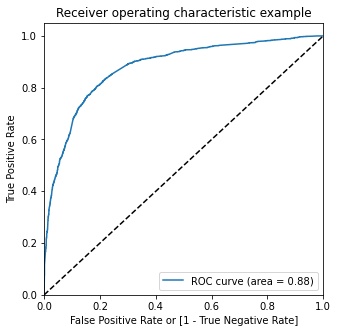

In [820]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [821]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.264129,8670,0,1,1,1,0,0,0,0,0,0,0
1,0,0.039030,1687,0,1,0,0,0,0,0,0,0,0,0
2,1,0.903438,3190,1,1,1,1,1,1,1,1,1,1,1
3,0,0.171944,895,0,1,1,0,0,0,0,0,0,0,0
4,0,0.281338,8058,0,1,1,1,0,0,0,0,0,0,0


In [822]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376867  1.000000  0.000000
0.1   0.1  0.601525  0.962057  0.383478
0.2   0.2  0.739593  0.912732  0.634880
0.3   0.3  0.802351  0.826728  0.787608
0.4   0.4  0.816333  0.755481  0.853136
0.5   0.5  0.815062  0.689713  0.890872
0.6   0.6  0.793772  0.578836  0.923763
0.7   0.7  0.780585  0.505059  0.947221
0.8   0.8  0.759136  0.408938  0.970933
0.9   0.9  0.708770  0.244098  0.989801


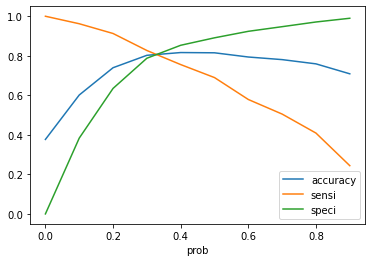

In [823]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, at about a threshold of 0.3, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 83-85%.

# Making Prediction on test dataset 

In [824]:
#create x_train and y_train
y_test = lead_test.pop('Converted')
X_test = lead_test

In [825]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6607,9.0,901,9.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2052,3.0,312,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
901,4.0,1425,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8577,3.0,1419,3.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7855,3.0,83,3.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [826]:
scaler = MinMaxScaler()
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6607,0.45,0.453447,0.90,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2052,0.15,0.157021,0.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
901,0.20,0.717162,0.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8577,0.15,0.714142,0.30,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7855,0.15,0.041772,0.30,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [827]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
6607,0.45,0.453447,0,0,0,0,1,0,0,0,1,0,0,0,0
2052,0.15,0.157021,0,0,0,0,0,0,0,1,0,0,0,0,0
901,0.20,0.717162,0,0,0,0,0,0,1,0,0,0,1,0,0
8577,0.15,0.714142,0,0,0,0,0,0,1,0,0,0,1,0,0
7855,0.15,0.041772,0,0,0,0,0,0,0,0,0,0,1,0,0


In [828]:
X_test.drop(['Lead Source_Welingak Website'],axis = 1,inplace =True)

In [831]:
X_test.drop(['Last Notable Activity_Email Opened'],axis=1,inplace= True)

In [832]:
X_test_sm = sm.add_constant(X_test)

Making prediction on test dataset

In [833]:
y_test_pred = res.predict(X_test_sm)

In [834]:
y_test_pred[:10]

6607    0.484145
2052    0.641913
901     0.774047
8577    0.761621
7855    0.033827
4272    0.530983
2562    0.952049
4117    0.074940
5666    0.974644
6044    0.093919
dtype: float64

In [835]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [836]:
# Let's see the head
y_pred_1.head()

,0
6607,0.484145
2052,0.641913
901,0.774047
8577,0.761621
7855,0.033827


In [837]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [838]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [839]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [840]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [841]:
y_pred_final.head()

,Converted,CustID,0
0,0,6607,0.484145
1,1,2052,0.641913
2,1,901,0.774047
3,0,8577,0.761621
4,0,7855,0.033827


In [842]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [843]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,6607,0.484145
1,1,2052,0.641913
2,1,901,0.774047
3,0,8577,0.761621
4,0,7855,0.033827


In [844]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [845]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,0,6607,0.484145,0
1,1,2052,0.641913,1
2,1,901,0.774047,1
3,0,8577,0.761621,1
4,0,7855,0.033827,0


In [846]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,0,6607,0.484145,0
1,1,2052,0.641913,1
2,1,901,0.774047,1
3,0,8577,0.761621,1
4,0,7855,0.033827,0


In [847]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.812824314306894

In [848]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1467,  192],
       [ 313,  726]], dtype=int64)

In [849]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [850]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6987487969201155

In [851]:
# Let us calculate specificity
TN / float(TN+FP)

0.8842676311030742

In [852]:
# positive predictive value = Percision
print(TP / float(TP+FP))

0.7908496732026143


In [853]:
# Let's see the sensitivity of our logistic regression model or Recall
print(TP / float(TP+FN))

0.6987487969201155


In [854]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.2
Date:                Tue, 14 Jun 2022   Deviance:                       5312.4
Time:                        13:06:34   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------